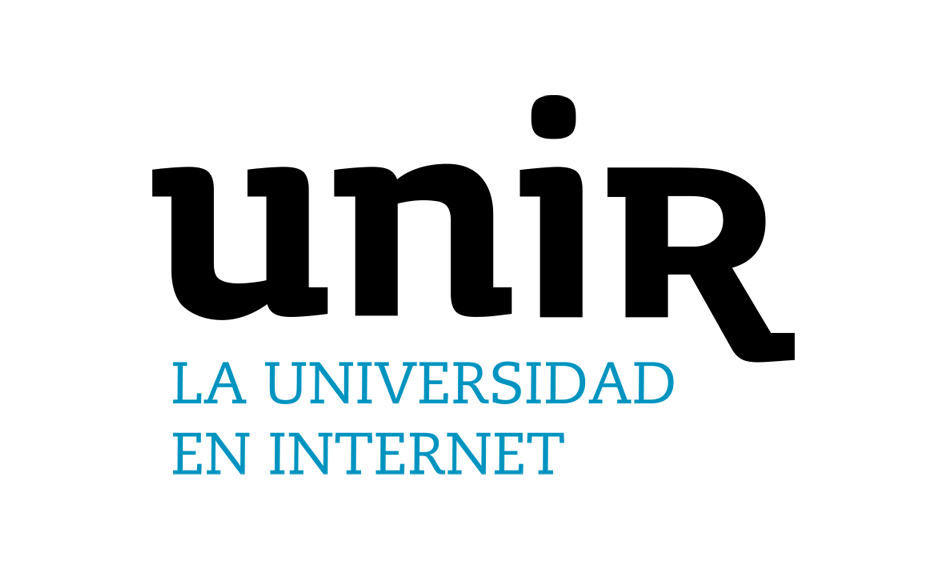
---


# **Máster Universitario en Inteligencia de Negocio**
# Proyecto Transversal

## Importar dataset

In [27]:
import pandas as pd
url = "https://github.com/anapaccasilva/AdventureWorks/blob/main/DataSet%20SQL%20Analisis%20Masivo%20de%20Datos%20(1).xlsx?raw=true"

In [28]:
customersPurchases = pd.read_excel(url ,sheet_name="Var Discreta Adq Bicicleta")

### Preparación

columnas inútiles:
- CustomerID
- PersonType
- PersonID

columnas redudantes
- Country
- CountryRegionCode
- BirthDate
- TotalAmount

In [29]:
customersPurchases.drop(['CustomerID', 'PersonType', 'PersonID', 'Country', 'BirthDate', 'DateFirstPurchase', 'TotalAmount', 'CountryRegionCode'], axis=1, inplace=True)  

# **Modelo de Clasificación**

### Preparación de los datos

Separa los datos entre train y test en una proporcion de 80/20

In [30]:
dict_yearly_income = {'0-25000': 1, '25001-50000': 2, '50001-75000': 3, '75001-100000': 4, 'greater than 100000': 5}

In [31]:
customersPurchases["YearlyIncome"] = customersPurchases["YearlyIncome"].map(dict_yearly_income)

In [32]:
from sklearn.model_selection import train_test_split

X = customersPurchases.drop(['BikePurchase'], axis=1)
y =customersPurchases['BikePurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123)

Transforma las variables categoricas en variables numericas

In [33]:
!pip install category-encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
encoder = ce.OrdinalEncoder(cols=['Group', 'MaritalStatus', 'Gender', 'Education', 'Occupation'])

In [35]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## Modelo de clasificación: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

modelo_rfc = RandomForestClassifier(n_estimators = 10,
                                    random_state=123)
modelo_rfc.fit(X_train, y_train)
y_pred = modelo_rfc.predict(X_test)
acc_randomforest = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo usando 10 árboles de decisión : {acc_randomforest}')

Accuracy del modelo usando 10 árboles de decisión : 0.7698133621855558


Matriz de confusión

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0     0.7596    0.7767    0.7681      1814
           1     0.7801    0.7631    0.7715      1883

    accuracy                         0.7698      3697
   macro avg     0.7698    0.7699    0.7698      3697
weighted avg     0.7700    0.7698    0.7698      3697



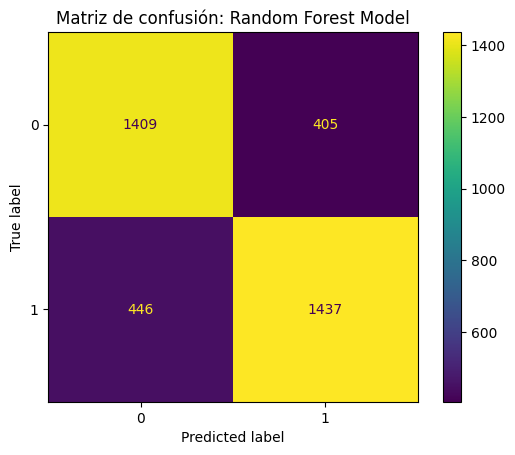

In [42]:
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de confusión: Random Forest Model')
plt.show()

## Modelo de clasificación: Regresión Logistica

In [43]:
from sklearn.linear_model import LogisticRegression
modelo_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)

Modelo y accuracy

In [44]:
clf2 = modelo_logistic.fit(X_train, y_train)
predictions = modelo_logistic.predict(X_test)

acc_logistic = modelo_logistic.score(X_test, y_test)
print(f'Accuracy del modelo usando regresion logistica: {acc_logistic}')

Accuracy del modelo usando regresion logistica: 0.6256424127671084


Matriz de confusión del modelo

              precision    recall  f1-score   support

           0     0.6222    0.6036    0.6128      1814
           1     0.6288    0.6468    0.6377      1883

    accuracy                         0.6256      3697
   macro avg     0.6255    0.6252    0.6252      3697
weighted avg     0.6255    0.6256    0.6255      3697



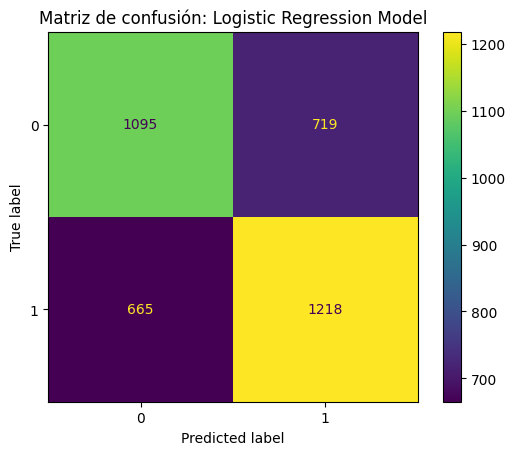

In [45]:
print(classification_report(y_test, predictions, digits=4))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de confusión: Logistic Regression Model')
plt.show()

## Árbol de decisión

El modelo de árbol de decisión fue construído con las mismas 6 variables independientes utilizadas en el modelo Random Forest mejorado

In [46]:
from sklearn.tree import DecisionTreeClassifier 

In [47]:
model = DecisionTreeClassifier (criterion="gini",
                                max_depth=2, 
                                min_samples_leaf=5, 
                                random_state=123)
clf3 = model.fit(X_train, y_train)

Modelo y accuracy

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_predict = model.predict(X_test)
acc_arbol = accuracy_score(y_test,y_predict)
print(f'Accuracy del modelo usando árbol de decisión: {acc_arbol}')

Accuracy del modelo usando árbol de decisión: 0.6058966729780904


Matriz de confusión del modelo

              precision    recall  f1-score   support

           0     0.5901    0.6444    0.6161      1814
           1     0.6241    0.5688    0.5952      1883

    accuracy                         0.6059      3697
   macro avg     0.6071    0.6066    0.6056      3697
weighted avg     0.6074    0.6059    0.6054      3697



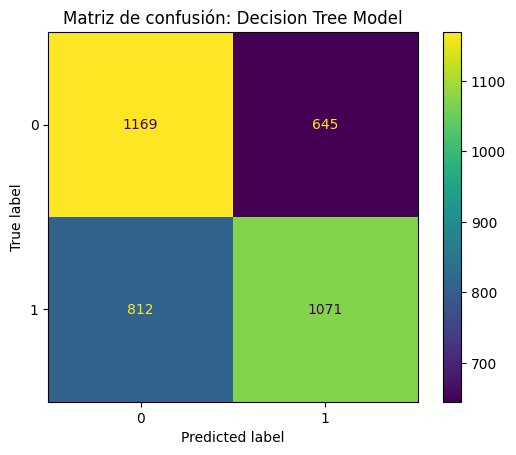

In [49]:
print(classification_report(y_test, y_predict, digits=4))

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de confusión: Decision Tree Model')
plt.show()

## Elección del mejor modelo

In [50]:
# diccionário con los modelos testados y la precisión de cada uno
accuracy_dict = {'Random Forest': acc_randomforest, 'Regresión Logistica': acc_logistic, 'Árbol de Decisión': acc_arbol}

# identifica en el diccionário el iten com mayor key (mayor accuracy entre los modelos)
max_value = max(accuracy_dict.values())  # maximum value
max_keys = ''.join([k for k, v in accuracy_dict.items() if v == max_value])

print(f'El modelo con mayor poder de clasificación es el modelo {max_keys} con {max_value} de accuracy')

El modelo con mayor poder de clasificación es el modelo Random Forest con 0.7698133621855558 de accuracy



<font face="Biome" size=5 color='#0093C0' > Análisis <font>

---



<font color='4A4A4A'> *Entre los diversos modelos de clasificación existentes, fueron tomados tres – [Random Forest](#scrollTo=Qi7UjP-W05ee&line=1&uniqifier=1), [Regresión Logística](#scrollTo=TgXQI9Sq7MT5&line=1&uniqifier=1) y [Árbol de Decisión](#scrollTo=zQ3gDcC4EPCv&line=1&uniqifier=1). Analizando las matrices de confusión entre los registros históricos y las previsiones de cada modelo, se nota que los 3 modelos tienen una precisión superior a 60%. De los 3 modelos, el modelo de árbol de decisión presentó un mayor numero de falsos negativos, o sea, poco más de la mitad de los clientes clasificados como no compradores de hecho compraron bicicleta. Con relación a los que sí compraron la bicicleta, la precisión de clasificación del modelo fue similar a de los otros dos. El modelo de clasificación logística tuvo un desempeño un poco mejor con relación a los que no compraron bicicleta, clasificando correctamente 60% de ellos. Es importante tener en cuenta que apenas la accuracy no significa que él modelo sea bueno, una vez que un dataset desbalanceado (es decir, con más incidencias de un valor do que otro para la variable que se desea predecir) puede tener una alta accuracy, pero baja precisión para cada valor. En ese caso, cómo observado en el [análisis preliminar](https://github.com/anapaccasilva/AdventureWorks_Python/blob/main/1.%20EDA_AdventureWorks.ipynb), los valores para la compra de bicicleta están distribuidos casi que igualmente entre los dos valores, por lo que en ese caso es seguro tomar la accuracy como factor de decisión de cuál modelo elegir. Luego de haber elegido el modelo ideal, fue creada una calculadora de clasificación donde el usuario inserta los datos del cliente de interés y recibe cómo respuesta una clasificación de que si es más probable que él compre o no una bicicleta.*

## Haciendo predicción con el modelo

In [97]:
def inic():
  print('''                                CALCULADORA DE PROBABILIDAD DE VENTA
          
          Esa es la calculadora de probailidad de ventas de bicicleta de AdventureWorks. 
          Contesta las preguntas con los datos del cliente y descubra si ella/él comprará una bicicleta''')

In [98]:
def age():
  age = 'edad'
  while type(age) != int:
    try:
      age = int(input('¿Cuál es la edad del cliente? '))
    except:
      print('Carácter inválido. Inserte un valor numérico\n')
      continue
  return age

In [99]:
def carros():
  carros = ' '
  while type(carros) != int:
    try:
      carros = int(input('¿Cuántos carros tiene el cliente? '))
    except:
      print('Carácter inválido. Inserte un valor numérico\n')
      continue
  return carros

In [100]:
def hijos():
  hijos = ' '
  while type(hijos) != int:
    try:
      hijos = int(input('¿Cuántos niños tiene el cliente en la casa? '))
    except:
      print('Carácter inválido. Inserte un valor numérico\n')
      continue
  return hijos

In [101]:
def education(): 
  education = ' '
  while type(education) != int:
      try:
        education = int(input(
        '''¿Cuál es el nivel de educación del cliente? Inserte el número con la opción correspondente: 
        1 - Bachelors
        2 - Partial College
        3 - Graduate Degree
        4 - Partial High School '''))
        
        if education in range(1,5):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 1 y 4\n')
          education = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return education

In [102]:
def countrygroup(): 
  countrygroup = ' '
  while type(countrygroup) != int:
      try:
        countrygroup = int(input(
        '''¿Cuál es la región del cliente? Inserte el número con la opción correspondente: 
        1 - North America
        2 - Europe
        3 - Pacific'''))
        
        if countrygroup in range(1,4):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 1 y 3\n')
          countrygroup = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return countrygroup

In [103]:
def occupation(): 
  occupation = ' '
  while type(occupation) != int:
      try:
        occupation = int(input(
        '''¿Cuál es el la ocupación del cliente? Inserte el número con la opción correspondente: 
        1 - Clerical
        2 - Management
        3 - Manual
        4 - Professional
        5 - Skilled Manual'''))

        
        if occupation in range(1,6):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 1 y 5\n')
          income = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return occupation

In [104]:
def marital(): 
  marital = ' '
  while type(marital) != int:
      try:
        marital = int(input(
        '''¿Cuál es el estado civil del cliente? Inserte el número con la opción correspondente: 
        1 - Married
        2 - Single '''))
        
        if marital in range(1,3):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 1 y 2\n')
          marital = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return marital

In [105]:
def gender(): 
  gender = ' '
  while type(gender) != int:
      try:
        gender = int(input(
        '''¿Cuál es el género del cliente? Inserte el número con la opción correspondente: 
        1 - Male
        2 - Female '''))
        
        if gender in range(1,3):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 1 y 2\n')
          gender = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return gender

In [106]:
def homeowner(): 
  homeowner = ' '
  while type(homeowner) != int:
      try:
        homeowner = int(input(
        '''¿El cliente es propietario de su casa? Inserte el número con la opción correspondente: 
        0 - No
        1 - Sí '''))
        
        if homeowner in range(0,2):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 0 y 1\n')
          homeowner = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return homeowner

In [107]:
def income(): 
  income = ' '
  while type(income) != int:
      try:
        income = int(input(
        '''¿Cuál es el rango de ingreso anual del cliente? Inserte el número con la opción correspondente: 
        1 - 0-25000 
        2 - 25001-50000 
        3 - 50001-75000
        4 - 75001-100000 
        5 - greater than 100000 '''))


        if income in range(1,6):
          pass
        else:
          print('Carácter inválido. Inserte un valor entre 1 y 5\n')
          income = ''

      except:
        print('Carácter inválido. Inserte un valor numérico\n')
        continue

  return income

In [108]:
def clasificacion():
  data = {'Group': countrygroup,      
          'Age': age, 
          'MaritalStatus': marital,
          'YearlyIncome': income,
          'Gender': gender,
          'TotalChildren': hijos, 
          'Education': education, 
          'Occupation': occupation,
          'HomeOwnerFlag': homeowner,
          'NumberCarsOwned':carros}
  calc = pd.DataFrame(data,  index=[0])
  classify = modelo_rfc.predict(calc)

  for i in classify:
    if int(i) == 1:
      print("\n Es probable que ese cliente comprará una bicicleta")
    elif int(i) == 0:
      print("\n Es probable que ese cliente NO comprará una bicicleta")

In [109]:
import time

#### MENU #####
inic()
time.sleep(5)
age = age()
carros = carros()
hijos = hijos()
education = education()
countrygroup = countrygroup()
marital = marital()
income = income()
occupation = occupation()
gender = gender()
homeowner = homeowner()
clasificacion()

                                CALCULADORA DE PROBABILIDAD DE VENTA
          
          Esa es la calculadora de probailidad de ventas de bicicleta de AdventureWorks. 
          Contesta las preguntas con los datos del cliente y descubra si ella/él comprará una bicicleta
¿Cuál es la edad del cliente? 26
¿Cuántos carros tiene el cliente? 1
¿Cuántos niños tiene el cliente en la casa? 0
¿Cuál es el nivel de educación del cliente? Inserte el número con la opción correspondente: 
        1 - Bachelors
        2 - Partial College
        3 - Graduate Degree
        4 - Partial High School 3
¿Cuál es la región del cliente? Inserte el número con la opción correspondente: 
        1 - North America
        2 - Europe
        3 - Pacific2
¿Cuál es el estado civil del cliente? Inserte el número con la opción correspondente: 
        1 - Married
        2 - Single 1
¿Cuál es el rango de ingreso anual del cliente? Inserte el número con la opción correspondente: 
        1 - 0-25000 
        2 - 2